<a href="https://colab.research.google.com/github/pokeychip19946/python-basics/blob/master/Day_4_2_KNN_IRIS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = data[['Species']].values

In [ ]:
x

In [ ]:
y

In [ ]:
### Split the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [ ]:
len(xtrain)

In [ ]:
len(xtest)

In [ ]:
import numpy as np
k = np.sqrt(len(xtrain))/2
k = int(np.round(k))
if k%2 == 0:
  k = k+1
k

5

In [ ]:
#### Build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = k)

In [ ]:
#### Train the model
model.fit(xtrain,ytrain)

In [ ]:
#### Do the predictions 
ypred = model.predict(xtest)

In [ ]:
ypred.shape

(30,)

In [ ]:
ytest = ytest.reshape(-1,)
ytest.shape

(30,)

In [ ]:
df = pd.DataFrame()
df['Actual Data'] = ytest
df["Predicted Data"] = ypred
df

In [ ]:
### Confusion Matrix- To find out the no. of correct and wrong predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

In [ ]:
accuracy = cm.diagonal().sum() / cm.sum()
accuracy

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest,ypred)
a

In [ ]:
error = 1 - accuracy
error

0.033333333333333326

In [ ]:
error = []
accuracy = []
for i in range(1,50):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  a = accuracy_score(ytest,ypred)
  accuracy.append(a)
  error.append(1-a)

In [ ]:
accuracy

In [ ]:
error

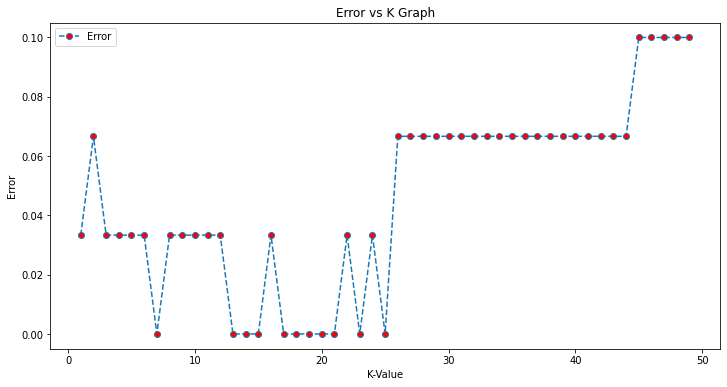

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,linestyle='dashed',marker="o"
,markerfacecolor="red",label="Error")
plt.title("Error vs K Graph")
plt.xlabel("K-Value")
plt.ylabel("Error")
plt.legend(loc=2)
plt.show()

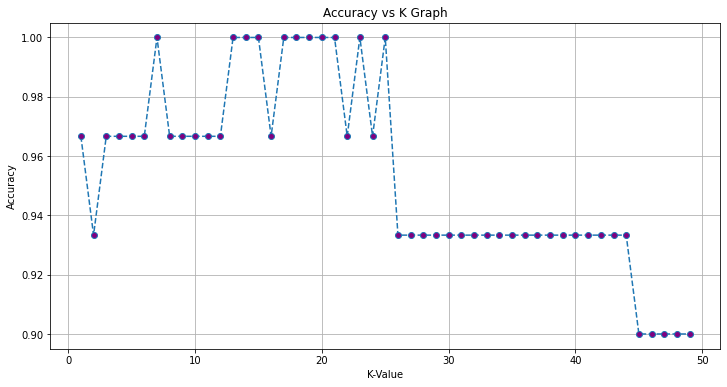

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),accuracy,linestyle='dashed',marker="o"
,markerfacecolor="purple")
plt.title("Accuracy vs K Graph")
plt.xlabel("K-Value")
plt.grid()
plt.ylabel("Accuracy")
plt.show()